The MIT License (MIT)<br>
Copyright (c) 2016,2017 Massachusetts Institute of Technology<br>

Authors: Justin Li, Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Gravity Recovery and Climate Experiment (GRACE) Data
# Source: http://grace.jpl.nasa.gov/
# Current surface mass change data, measuring equivalent water thickness in cm, versus time
# with a resolution of 1x1 degree

In [3]:
from skdaccess.geo.grace import DataFetcher as GR_DF
from skdaccess.utilities.grace_util import computeEWD
from skdaccess.framework.param_class import *

In [4]:
geo_point = AutoList([(38, -117)]) # location in Nevada
grace_fetcher = GR_DF([geo_point],start_date='2010-01-01',end_date='2014-01-01')

In [5]:
grace_data_wrapper = grace_fetcher.output() # Get a data wrapper
grace_data = grace_data_wrapper.get() # Get GRACE data

In [6]:
grace_data['38, -117'].head()

,CSR,GFZ,JPL
Date,,,
2010-01-17 00:00:00,-1.564813,-2.012964,-3.849506
2010-02-15 12:00:00,3.270973,2.980853,2.286743
2010-03-17 00:00:00,5.448462,3.252425,5.566326
2010-04-16 12:00:00,6.534275,4.658304,4.388913
2010-05-17 00:00:00,6.079895,4.922144,2.370604


In [7]:
# Calibrate GRACE
scale_factor = grace_data_wrapper.info('38, -117')['scale_factor']
combined_ewd = computeEWD(grace_data['38, -117'], scale_factor)

<IPython.core.display.Javascript object>


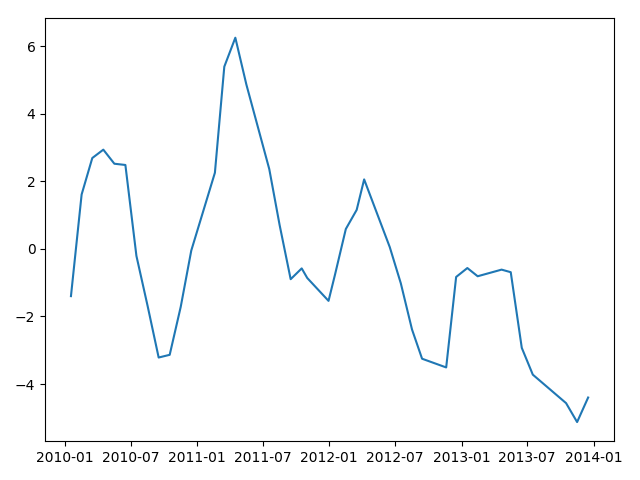

In [8]:
# Plot calibrated data
plt.figure();
plt.plot(combined_ewd);
plt.tight_layout()